In [44]:
import pandas as pd # Імпорт бібліотеки pandas для роботи з табличними даними (DataFrame)
import seaborn as sns # Імпорт бібліотеки seaborn для створення статистичних візуалізацій
import matplotlib.pyplot as plt # Імпорт бібліотеки matplotlib для створення графіків та діаграм
from seaborn import axes_style

plt.rcParams['figure.figsize'] = (18.0, 8.0)

In [45]:

taxis = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv') # Завантаження датасету про таксі з GitHub

taxis['pickup'] = pd.to_datetime(taxis['pickup']) # Конвертування колонки 'pickup' з текстового формату в формат дати/часу
taxis.insert(column='date', loc=0, value=taxis['pickup'].dt.date) # Створення нової колонки 'date' з тільки датою (без часу) та вставка її на позицію 0 (перша колонка)
taxis = taxis[taxis['total'] <= taxis['total'].quantile(.95)] # Фільтрація даних: видалення викидів - залишаємо тільки поїздки, де загальна вартість не перевищує 95-й перцентиль

borough_rides = taxis.groupby('pickup_borough', as_index=False)['pickup'].count() # Групування даних за районом посадки (pickup_borough) та підрахунок кількості поїздок з кожного району
borough_dropoffs = taxis.groupby('dropoff_borough', as_index=False)['pickup'].count() # Групування даних за районом висадки (dropoff_borough)та підрахунок кількості поїздок до кожного району

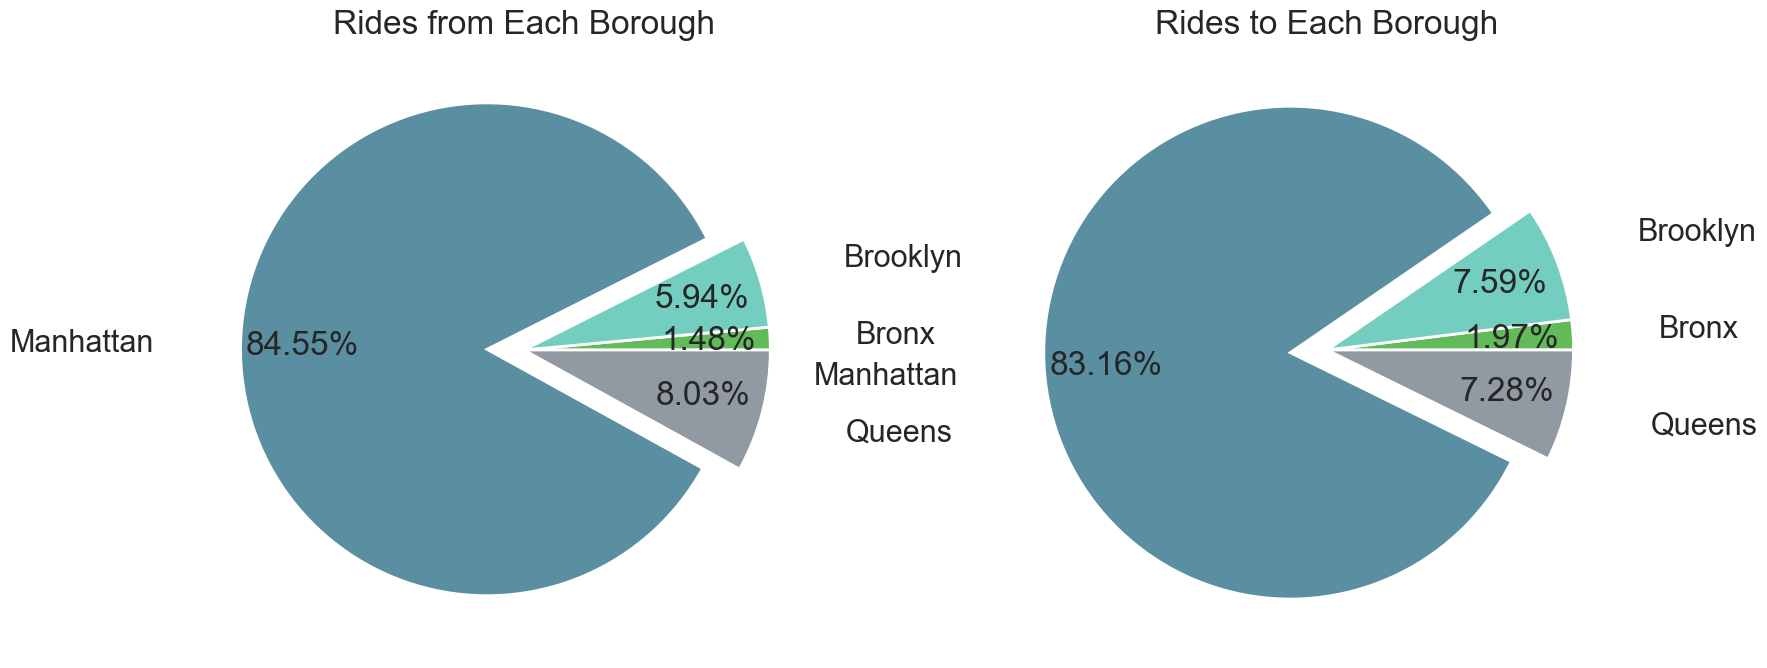

In [70]:
fig, ax = plt.subplots(ncols=2, figsize=(19, 8)) # Створення фігури з 2 підграфіками розміщеними в 1 ряд (ncols=2), figsize=(10, 4) - розмір полотна: ширина 10, висота 4 дюйми, fig - об'єкт всієї фігури, ax - масив з двох осей координат

ax[0].pie( # Створення першої кругової діаграми на ax[0] (лівий графік)
    x=borough_rides['pickup'], # Значення для секторів (кількість поїздок)
    labels=borough_rides['pickup_borough'], # Назви районів для підписів
    colors=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'], # Кольори секторів (зелений, бірюзовий, синій, сірий)
    explode=[0, 0, 0.15, 0], # Відділення секторів: третій сектор виділено на 0.15
    autopct="%.2f%%", # Формат відсотків на секторах (2 знаки після коми)
    pctdistance=0.75, # Відстань відсотків від центру (0.75 від радіуса)
    labeldistance=1.35, # Відстань підписів районів від центру
)
ax[0].set_title('Rides from Each Borough') # Встановлення заголовка для першого графіка

ax[1].pie( # Створення другої кругової діаграми на ax[1] (правий графік)
    x=borough_dropoffs['pickup'], # Значення для секторів (кількість висадок)
    labels=borough_dropoffs['dropoff_borough'], # Назви районів призначення
    colors=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'], # Ті самі кольори для секторів, що й в попередньому графіку
    explode=[0, 0, 0.15, 0], # Третій сектор також виділено
    autopct="%.2f%%", # Формат відсотків
    pctdistance=0.75, # Позиція відсотків
    labeldistance=1.35, # Позиція підписів
)
ax[1].set_title('Rides to Each Borough') # Встановлення заголовка для другого графіка

plt.show() # Відображення фігури з обома графіками на екрані

In [47]:
borough_daily_rides = taxis.groupby(['pickup_borough', 'date'], as_index=False)['pickup'].count()
borough_list = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens']

In [71]:
borough_daily_rides

,pickup_borough,date,pickup
0,Bronx,2019-03-01,7
1,Bronx,2019-03-03,2
2,Bronx,2019-03-04,5
3,Bronx,2019-03-05,1
4,Bronx,2019-03-06,3
...,...,...,...
117,Queens,2019-03-27,16
118,Queens,2019-03-28,19
119,Queens,2019-03-29,12
120,Queens,2019-03-30,19


/var/folders/1w/5fknmcjj7_g7sfbf2lffwy1h0000gn/T/ipykernel_87952/761358536.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[x][y].set_xticklabels(temp_df['date'], rotation=20, fontsize='small')   # Налаштування міток на осі X (дати), rotation=20 - поворот тексту на 20 градусів (щоб не перекривались), fontsize='small' - маленький розмір шрифту
/var/folders/1w/5fknmcjj7_g7sfbf2lffwy1h0000gn/T/ipykernel_87952/761358536.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[x][y].set_xticklabels(temp_df['date'], rotation=20, fontsize='small')   # Налаштування міток на осі X (дати), rotation=20 - поворот тексту на 20 градусів (щоб не перекривались), fontsize='small' - маленький розмір шрифту
/var/folders/1w/5fknmcjj7_g7sfbf2lffwy1h0000gn/T/ipykernel_87952/761358536.py:10: UserWarning: set_ticklabels() should only be u

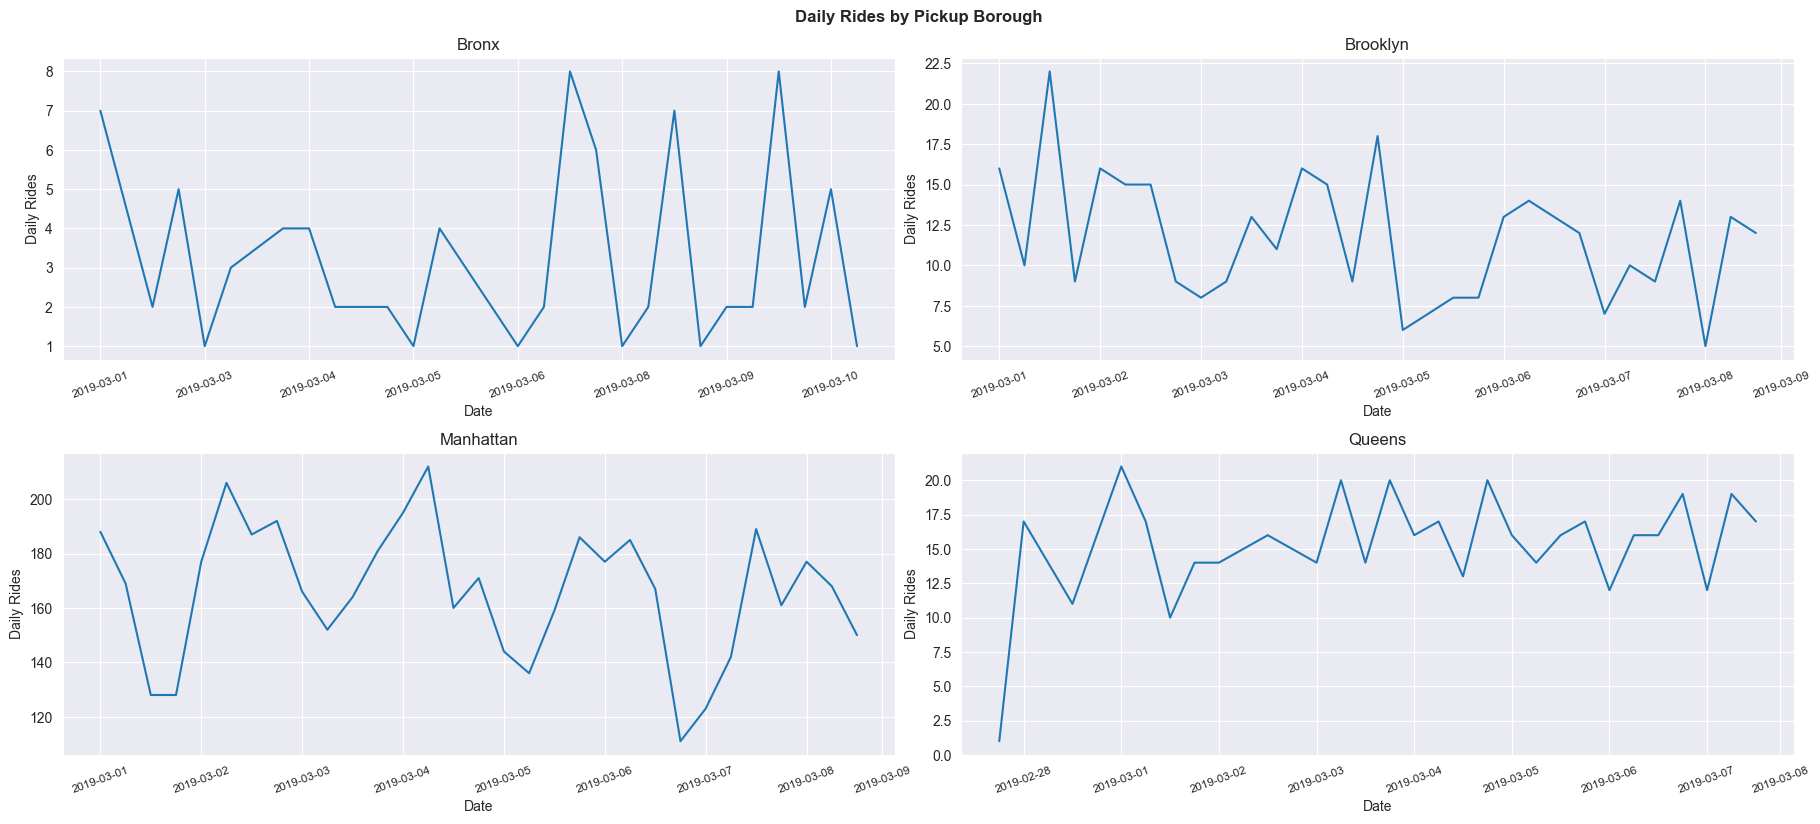

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 8)) # Створення фігури з сіткою 2×2 (4 підграфіки), nrows=2 - 2 рядки, ncols=2 - 2 колонки, figsize=(10, 8) - розмір полотна: ширина 10, висота 8 дюймів, fig - об'єкт фігури, ax - масив підграфіків розміром 2×2
fig.tight_layout(h_pad=5, w_pad=2) # Автоматичне налаштування відступів між графіками, h_pad=5 - вертикальний відступ між рядками (height padding), w_pad=2 - горизонтальний відступ між колонками (width padding)
ax[0][0].set_ylim(0, 8000) # Встановлення межі осі Y для першого підграфіка (верхній лівий) від 0 до 8000

for i in range(len(borough_list)): # Цикл для створення графіка для кожного району, range(len(borough_list)) - це 0, 1, 2, 3 (4 райони)
    x = i // 2     # Визначення позиції графіка в сітці 2×2
    y = i % 2     # % - залишок від ділення (для номера колонки)
    temp_df = borough_daily_rides[borough_daily_rides['pickup_borough'] == borough_list[i]]     # Фільтрація даних: вибираємо тільки рядки для поточного району

    ax[x][y].plot('date', 'pickup', data=temp_df)      # Побудова лінійного графіка на поточному підграфіку
    ax[x][y].set_xticklabels(temp_df['date'], rotation=20, fontsize='small')   # Налаштування міток на осі X (дати), rotation=20 - поворот тексту на 20 градусів (щоб не перекривались), fontsize='small' - маленький розмір шрифту
    ax[x][y].set_xlabel('Date')     # Підпис осі X
    ax[x][y].set_ylabel('Daily Rides')     # Підпис осі Y
    ax[x][y].set_title(borough_list[i])     # Заголовок для кожного підграфіка (назва району)

fig.suptitle('Daily Rides by Pickup Borough', fontweight='bold') # Загальний заголовок для всієї фігури (над усіма графіками)
fig.subplots_adjust(top=0.92) # Коригування верхнього відступу, щоб загальний заголовок не перекривав графіки, top=0.92 означає, що підграфіки займають тільки 92% висоти (8% зверху - для заголовка)

plt.show() # Відображення всіх графіків на екрані

In [72]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets/master/Loan%20Eligibility/loan-test.csv' # URL-адреса CSV-файлу з даними про кредитні заявки на GitHub
df = pd.read_csv(url) # Завантаження CSV-файлу у DataFrame
df2 = df.copy()

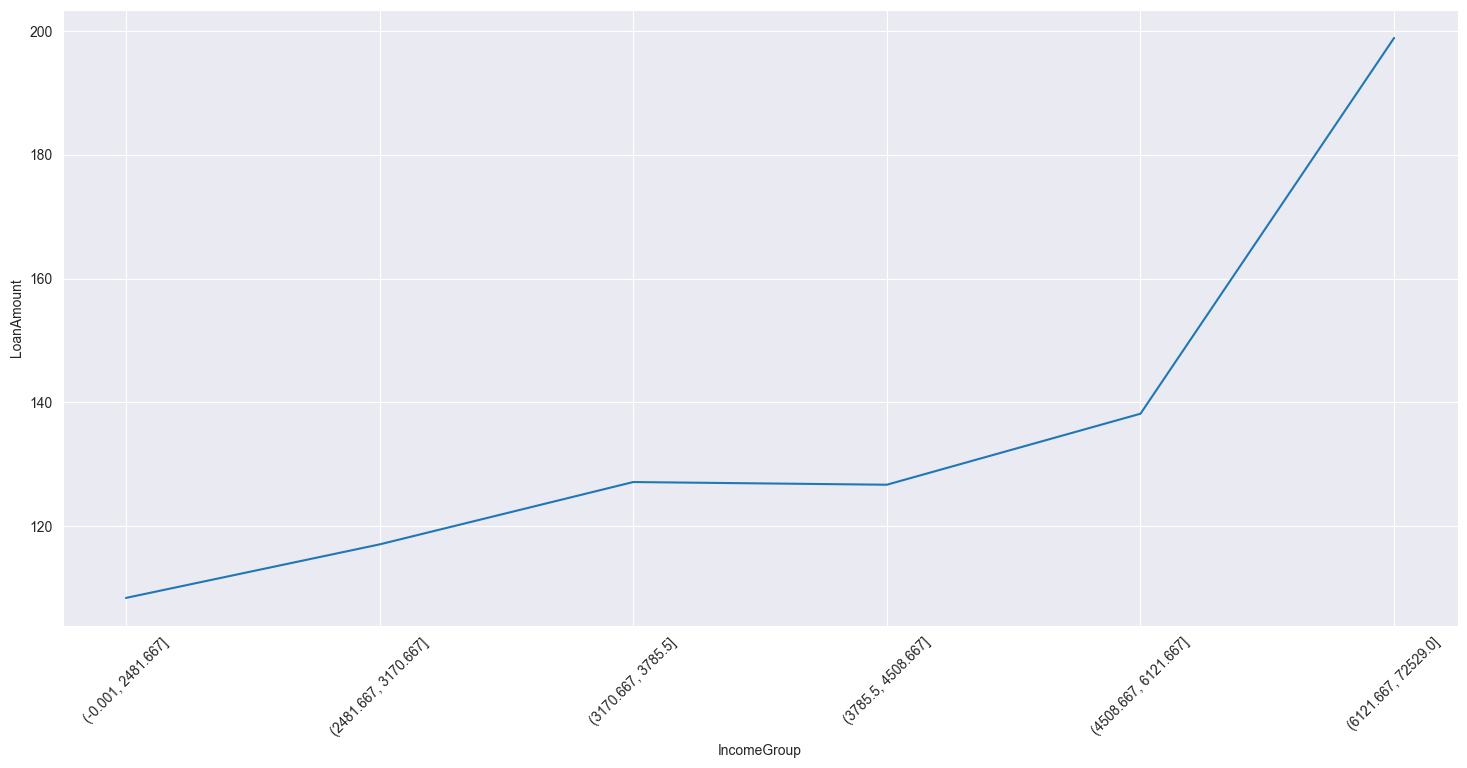

In [51]:

# Очистка, вибір двох колонок (дохід і сума кредиту) та видалення рядків з пропусками
df = df[['ApplicantIncome', 'LoanAmount']].dropna()

# Категоризація + приведення до str, розбиття доходів на 6 рівних груп за квантилями і конвертація у текст
df['IncomeGroup'] = pd.qcut(df['ApplicantIncome'], q=6).astype(str)

# Агрегація, групування за групами доходу та обчислення середньої суми кредиту для кожної групи
grouped = df.groupby('IncomeGroup', as_index=False)['LoanAmount'].mean()

sns.lineplot(grouped, x='IncomeGroup', y='LoanAmount') # Побудова лінійного графіка залежності середньої суми кредиту від групи доходу
plt.xticks(rotation=45) # Поворот підписів осі X на 45 градусів для кращої читабельності
plt.grid(True) # Додавання сітки на графік
plt.show() # Відображення графіка

In [52]:
# Прибираємо зайві пробіли
df.columns = df.columns.str.strip()
df

,ApplicantIncome,LoanAmount,IncomeGroup
0,5720,110.0,"(4508.667, 6121.667]"
1,3076,126.0,"(2481.667, 3170.667]"
2,5000,208.0,"(4508.667, 6121.667]"
3,2340,100.0,"(-0.001, 2481.667]"
4,3276,78.0,"(3170.667, 3785.5]"
...,...,...,...
362,4009,113.0,"(3785.5, 4508.667]"
363,4158,115.0,"(3785.5, 4508.667]"
364,3250,126.0,"(3170.667, 3785.5]"
365,5000,158.0,"(4508.667, 6121.667]"


In [77]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


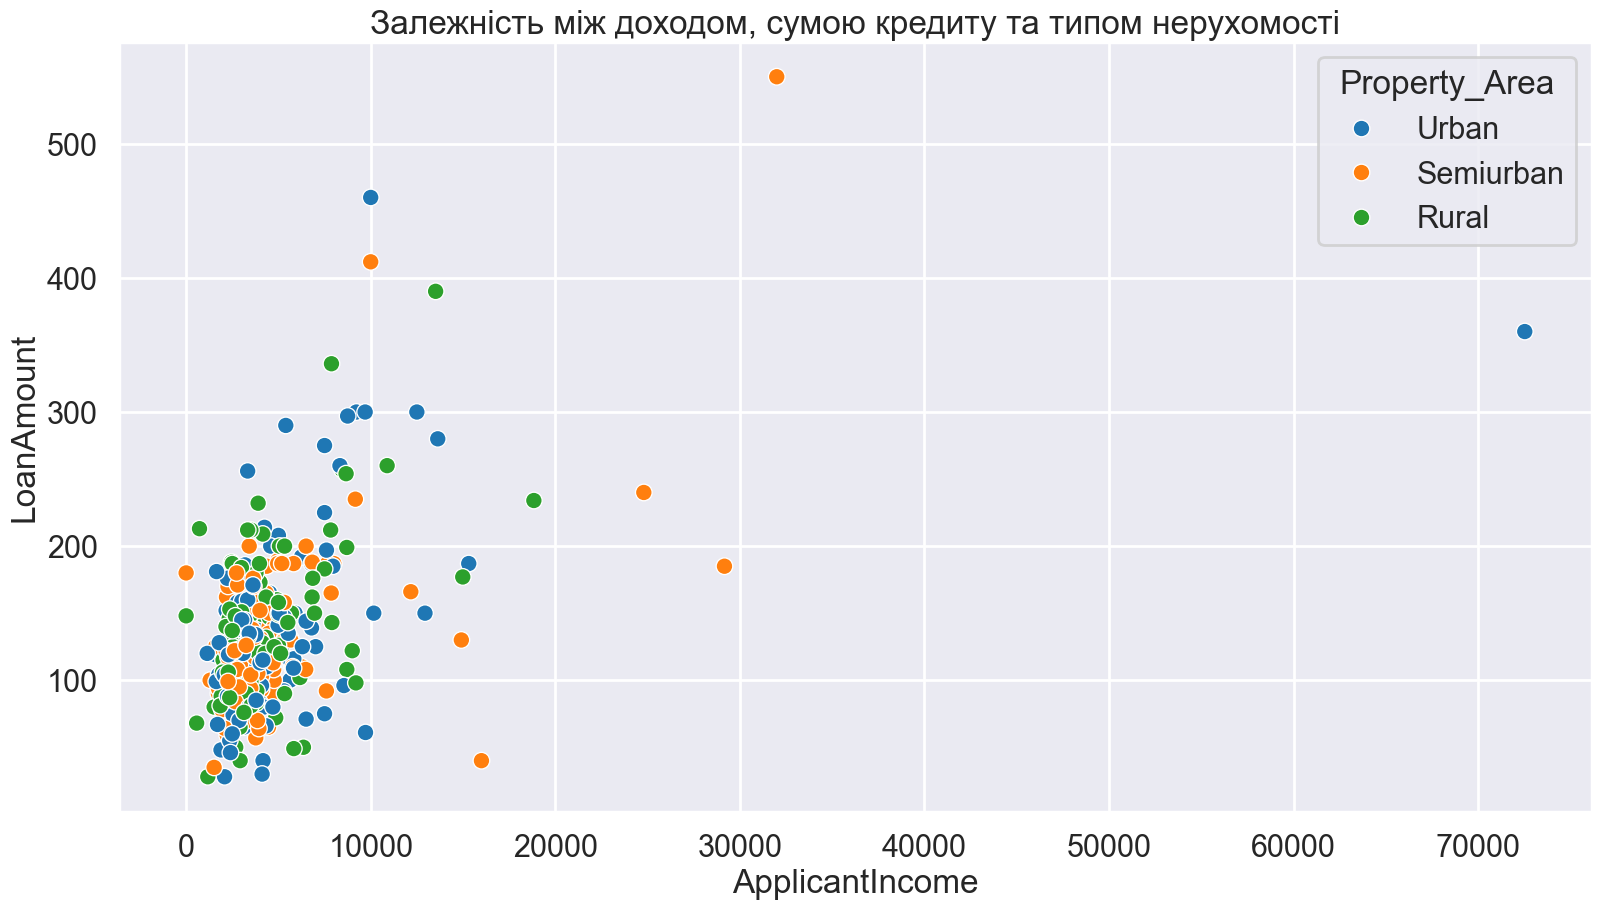

In [79]:
plt.figure(figsize=(19, 10))
sns.scatterplot(df2, x='ApplicantIncome', y='LoanAmount', hue='Property_Area') # Створення діаграми розсіювання з доходом на осі X, сумою кредиту на осі Y та кольоровим розподілом за типом нерухомості
plt.title('Залежність між доходом, сумою кредиту та типом нерухомості') # Встановлення заголовка графіка
plt.show() # Відображення графіка на екрані

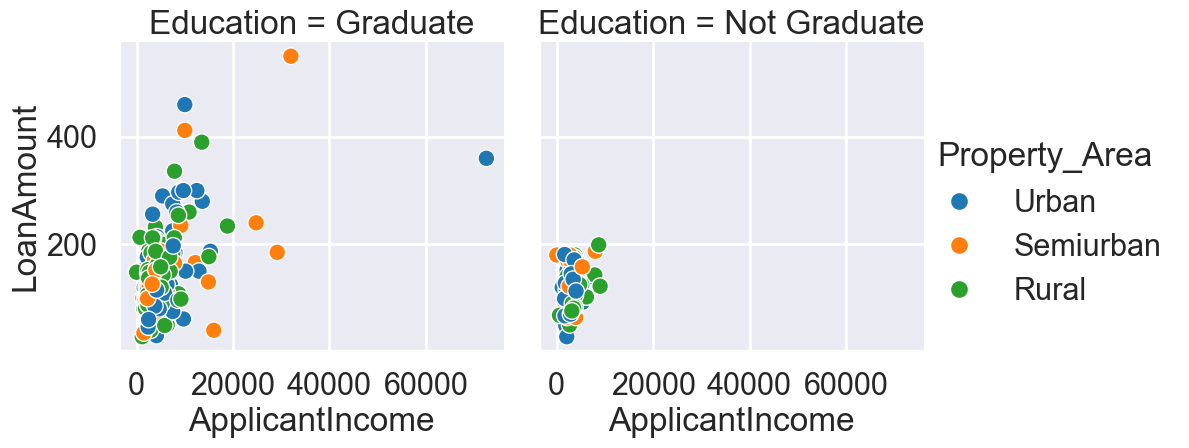

In [84]:
sns.relplot(df2, x='ApplicantIncome', y='LoanAmount', col='Education', hue='Property_Area', kind='scatter')
plt.show()

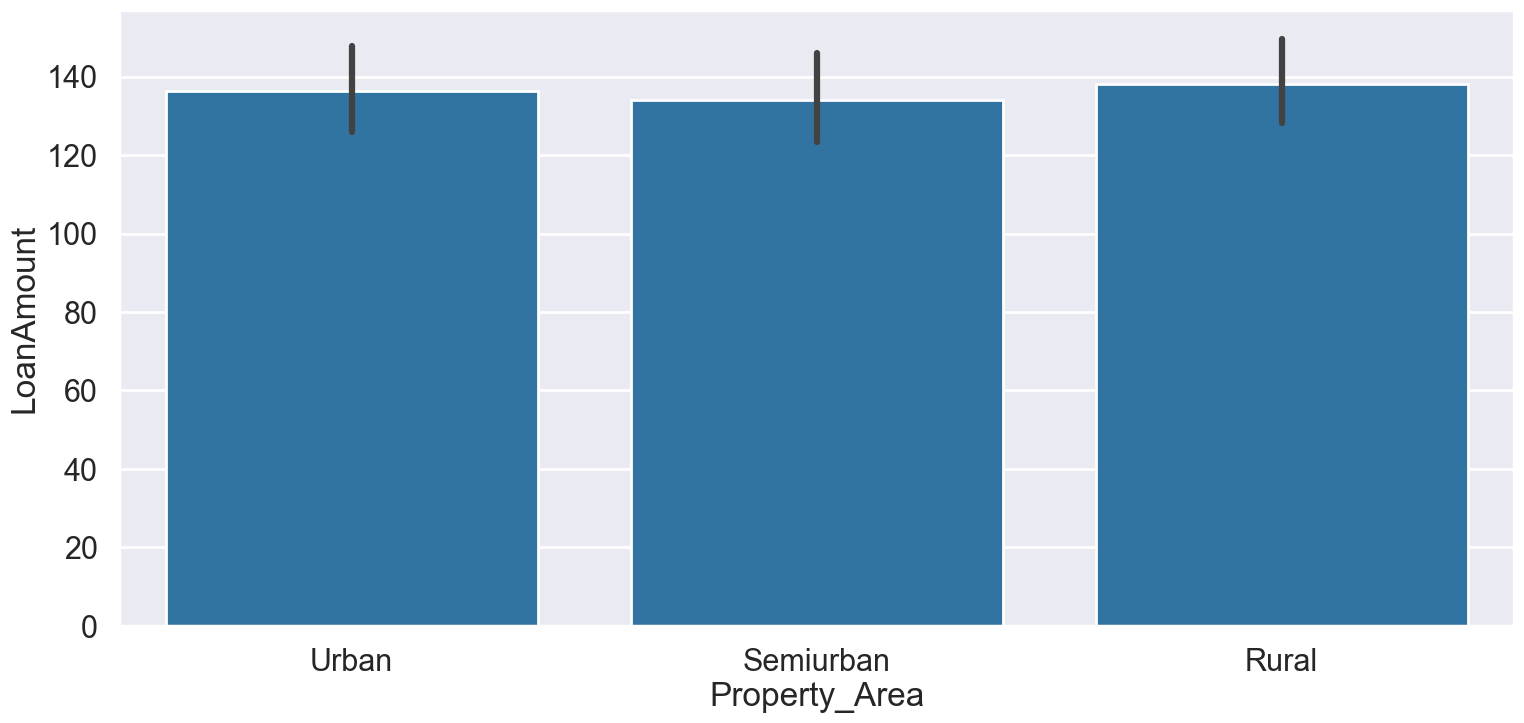

In [90]:
sns.barplot(df2, x='Property_Area', y='LoanAmount')
plt.show()

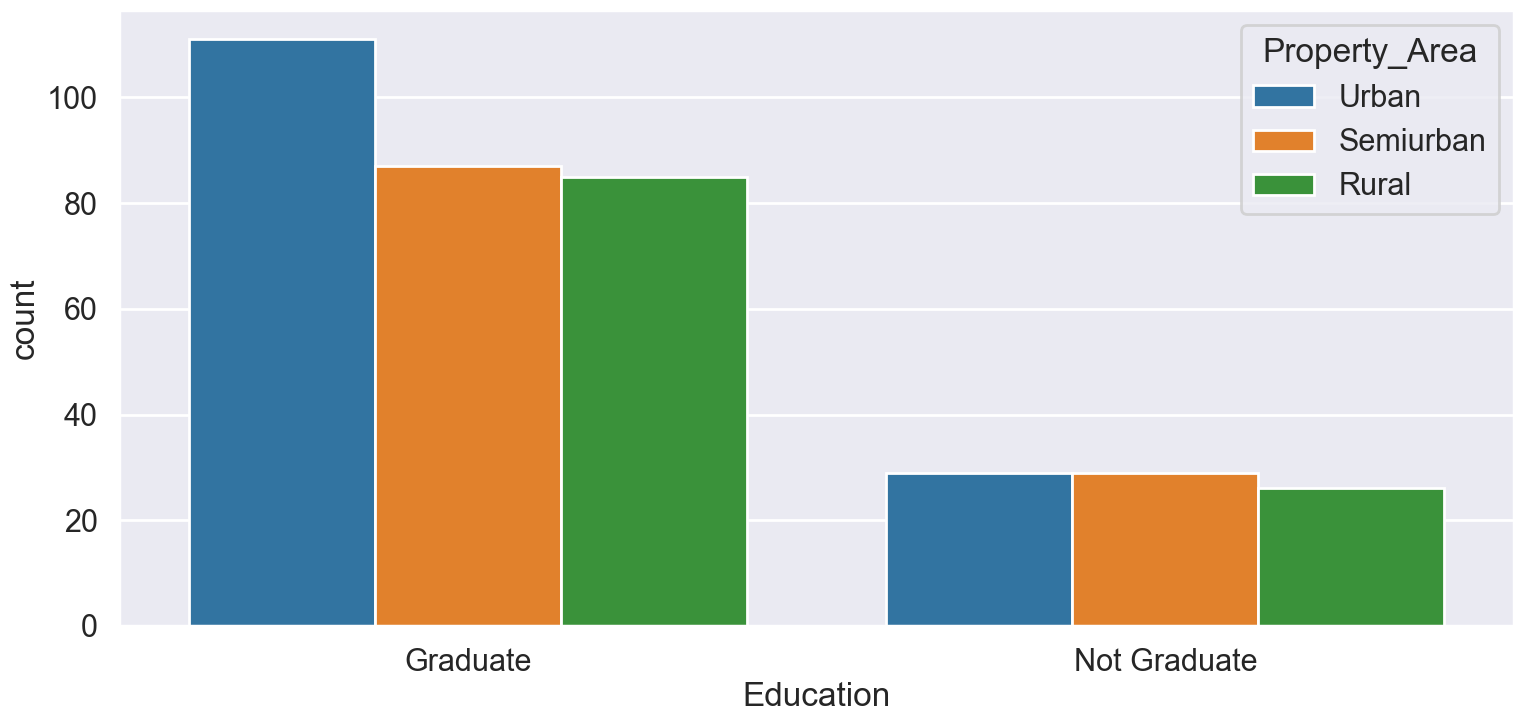

In [89]:
sns.countplot(df2, x='Education', hue='Property_Area')
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

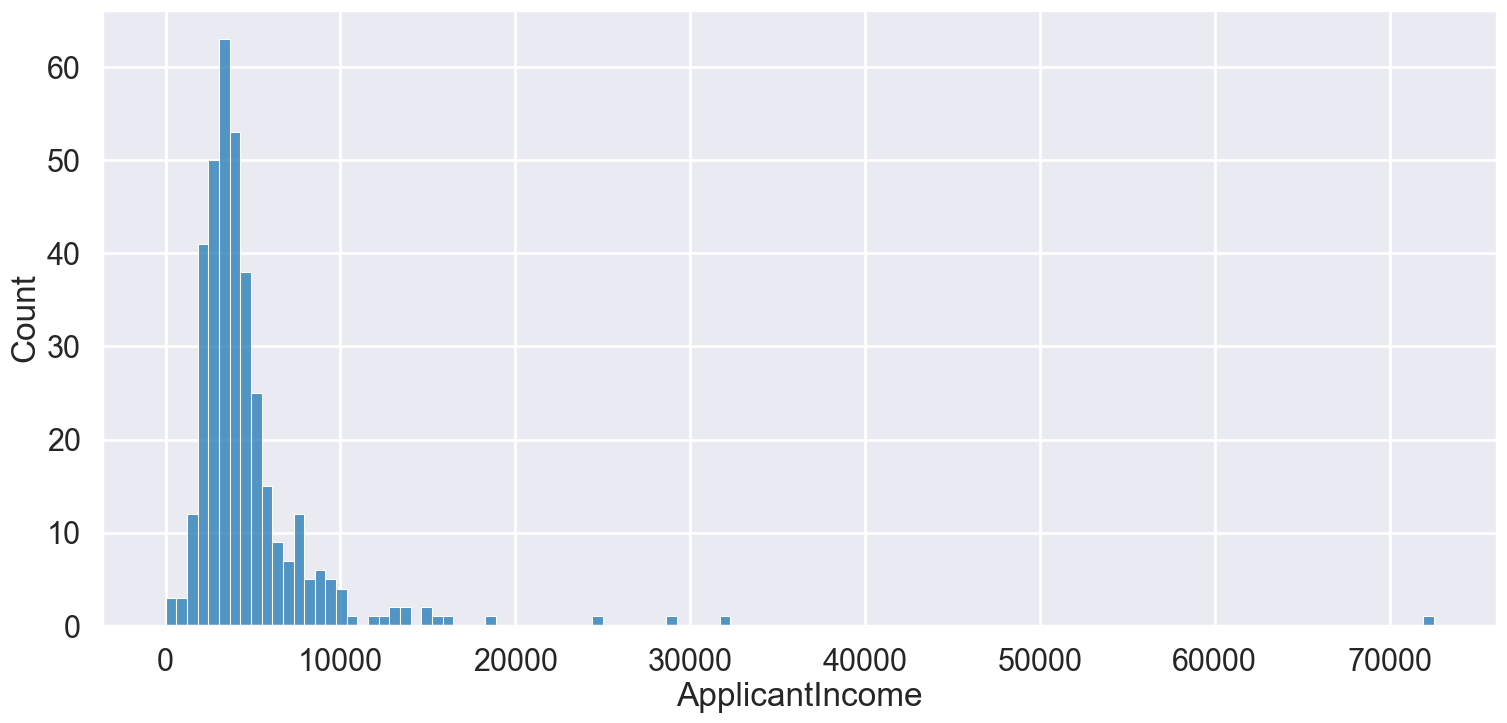

In [86]:
sns.histplot(df2, x='ApplicantIncome')

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

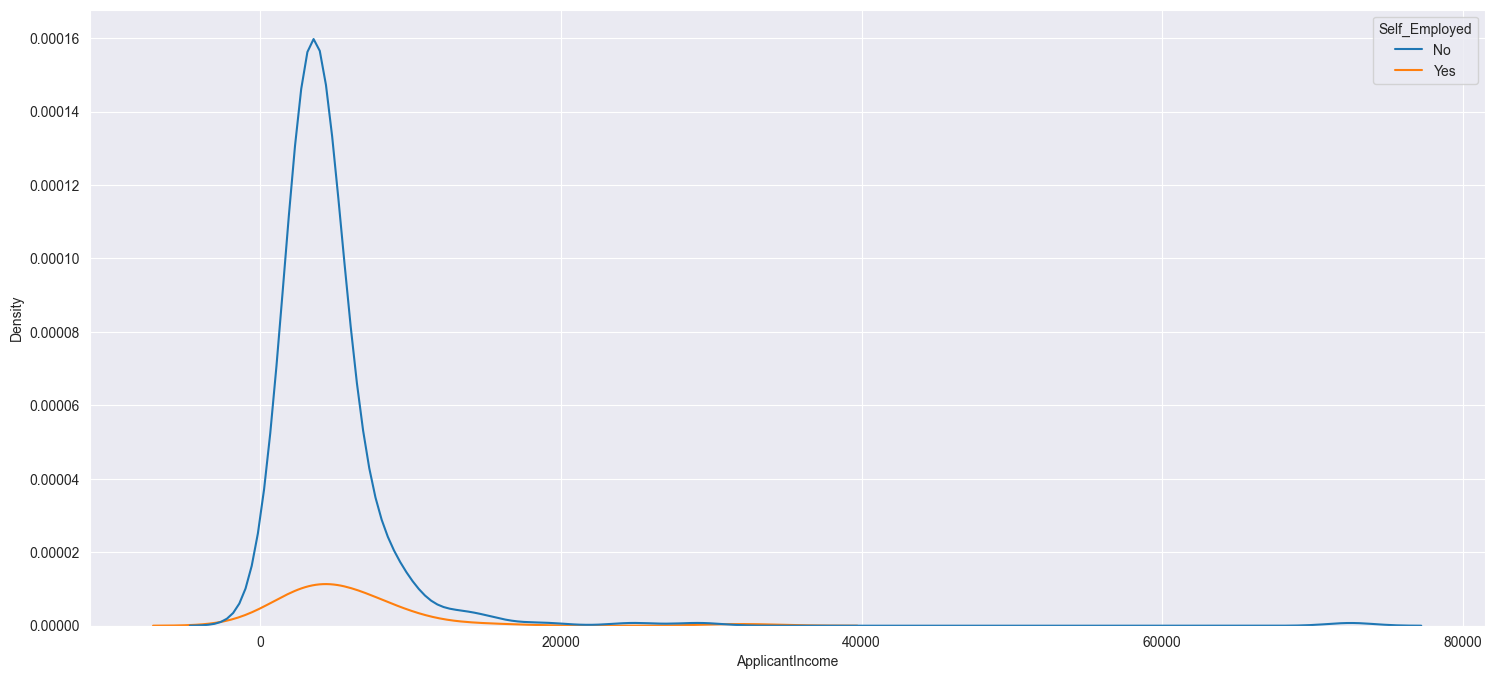

In [57]:
sns.kdeplot(df2, x='ApplicantIncome', hue='Self_Employed')

<Axes: xlabel='LoanAmount', ylabel='Education'>

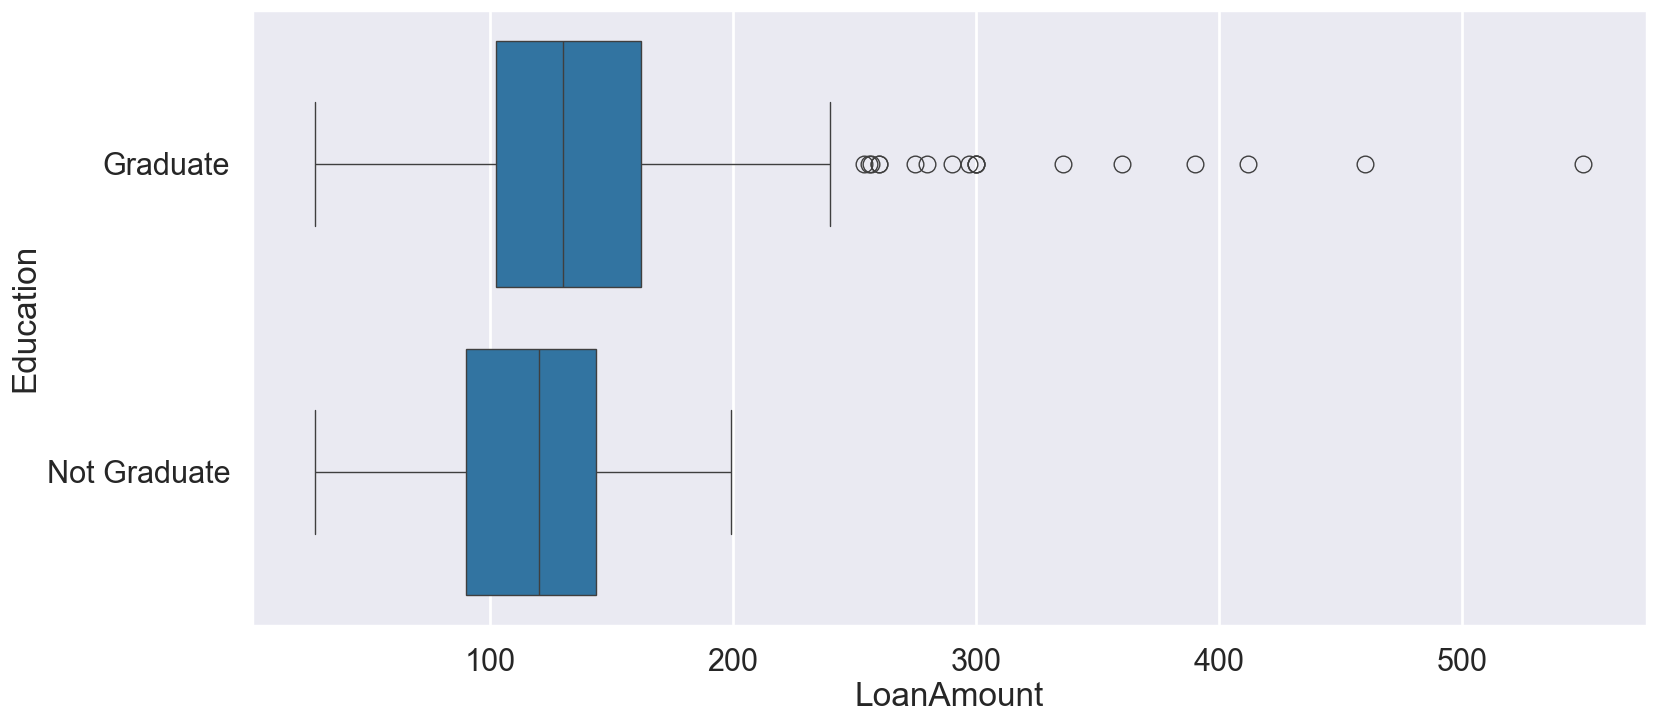

In [91]:
sns.boxplot(df2, x='LoanAmount', y='Education')

<Axes: xlabel='LoanAmount', ylabel='Education'>

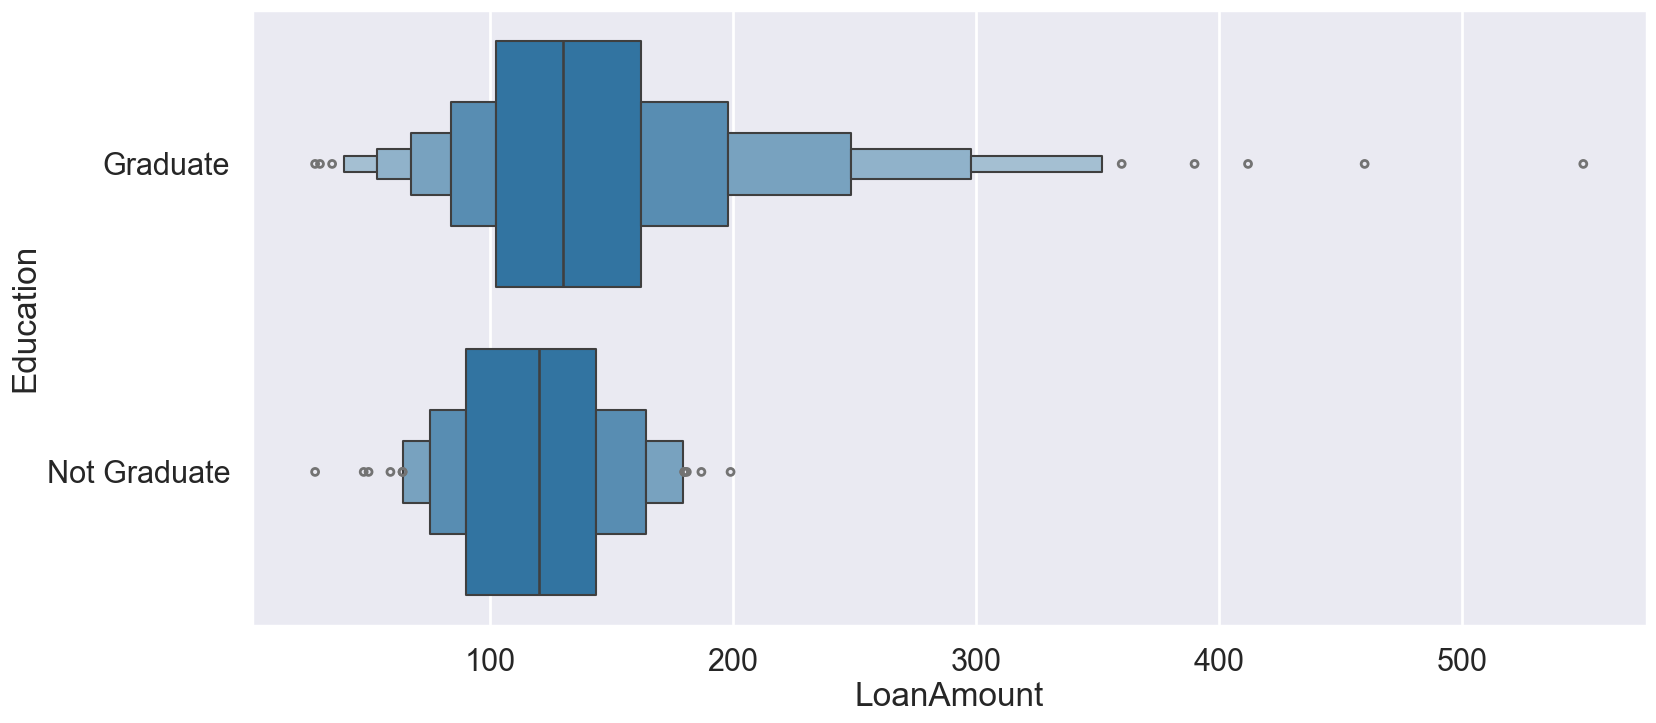

In [92]:
sns.boxenplot(df2, x='LoanAmount', y='Education')

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

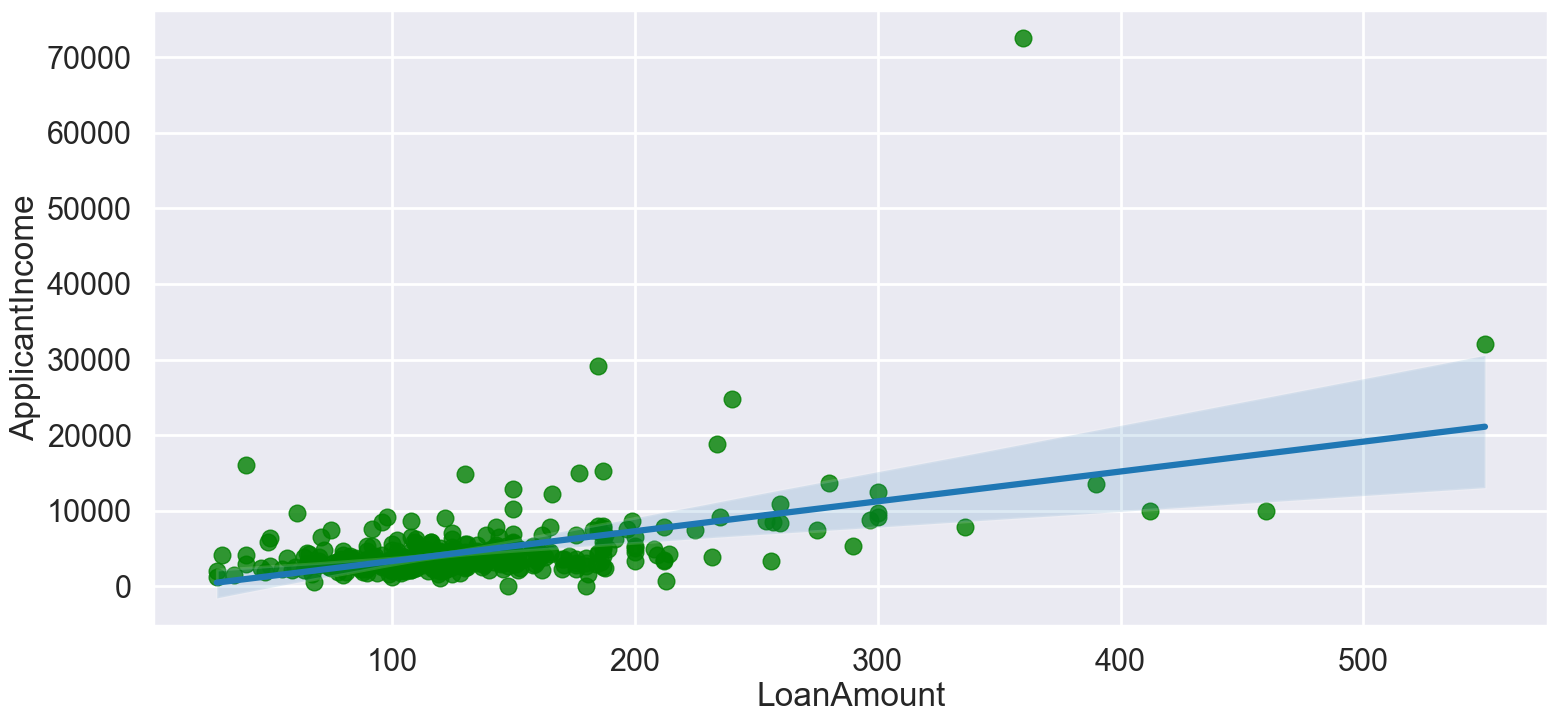

In [93]:
sns.regplot(df2, x='LoanAmount', y='ApplicantIncome', scatter_kws={'color': 'g'})

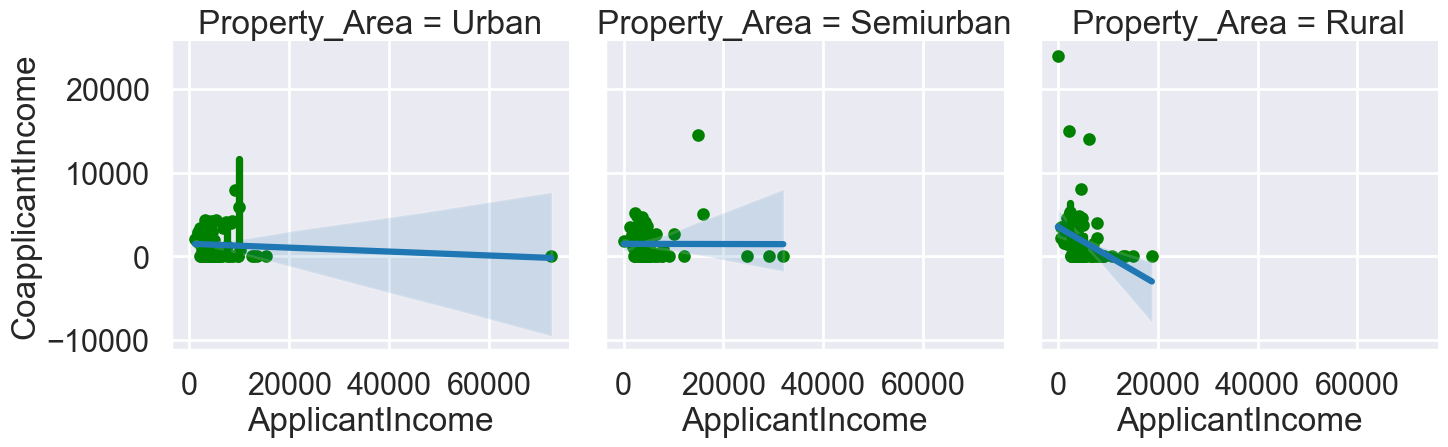

In [94]:
from numpy import median # Імпорт функції median з бібліотеки NumPy для обчислення медіани

# Створення сітки графіків розсіювання з лініями регресії
sns.lmplot(df2, x='ApplicantIncome', y='CoapplicantIncome', col='Property_Area',
           col_wrap=3, scatter_kws={'color':'g'}, x_estimator=median)

<Axes: xlabel='Education', ylabel='LoanAmount'>

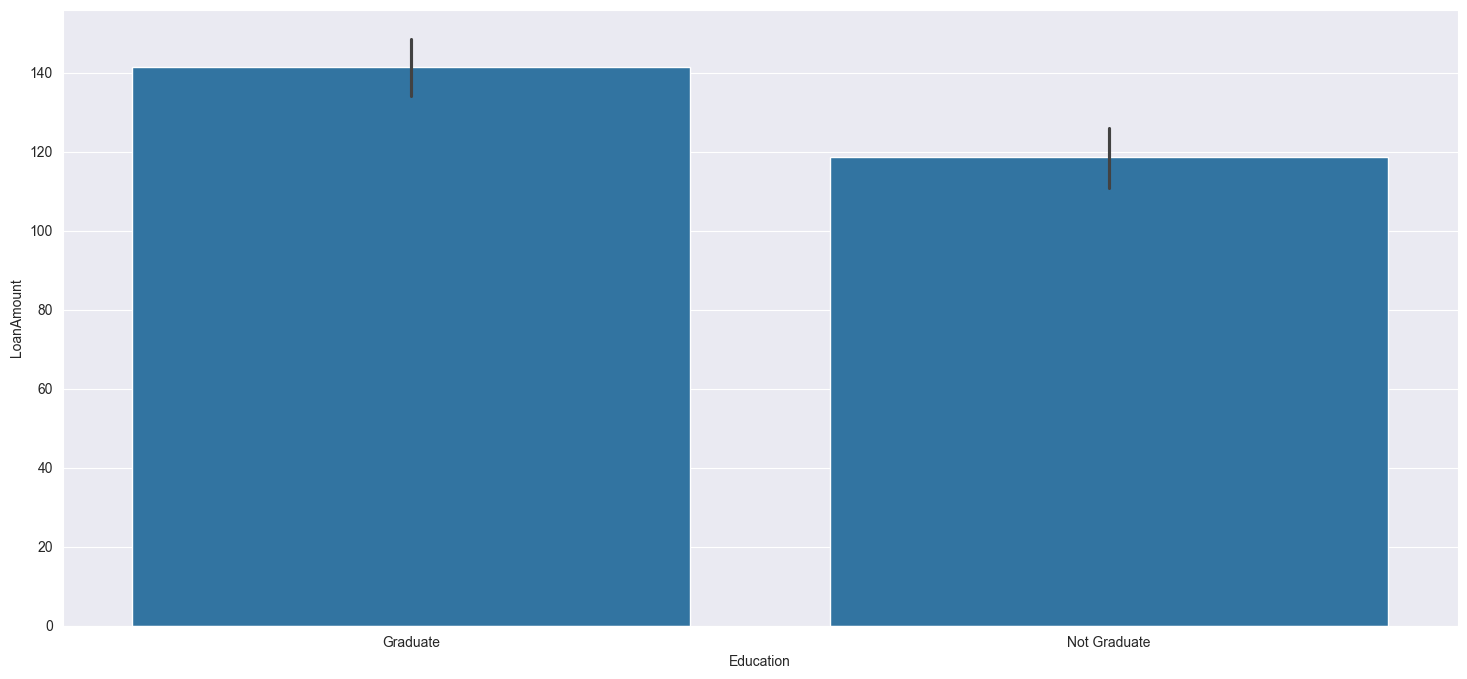

In [66]:
sns.set_style("darkgrid") # Встановлення глобального стилю оформлення - темний фон з білими лініями сітки
sns.barplot(df2, x='Education', y='LoanAmount') # Створення стовпчикової діаграми, яка автоматично групує дані за рівнем освіти (Graduate/Not Graduate), обчислює середню суму кредиту для кожної групи, малює стовпчики відповідної висоти та додає лінії довірчого інтервалу (95%) для показу надійності оцінки


In [97]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


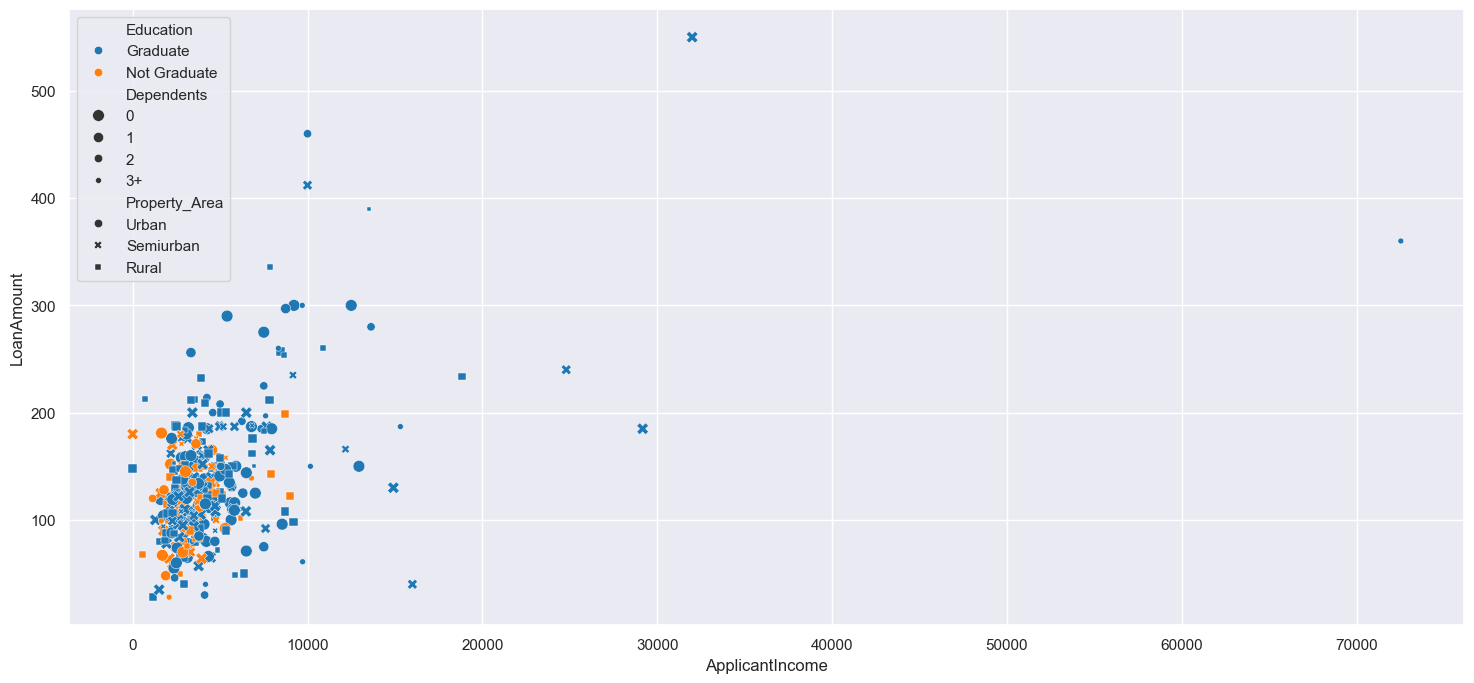

In [110]:
sns.scatterplot(df2,
x='ApplicantIncome', y='LoanAmount',
hue='Education',
style='Property_Area',
size='Dependents')
plt.show()


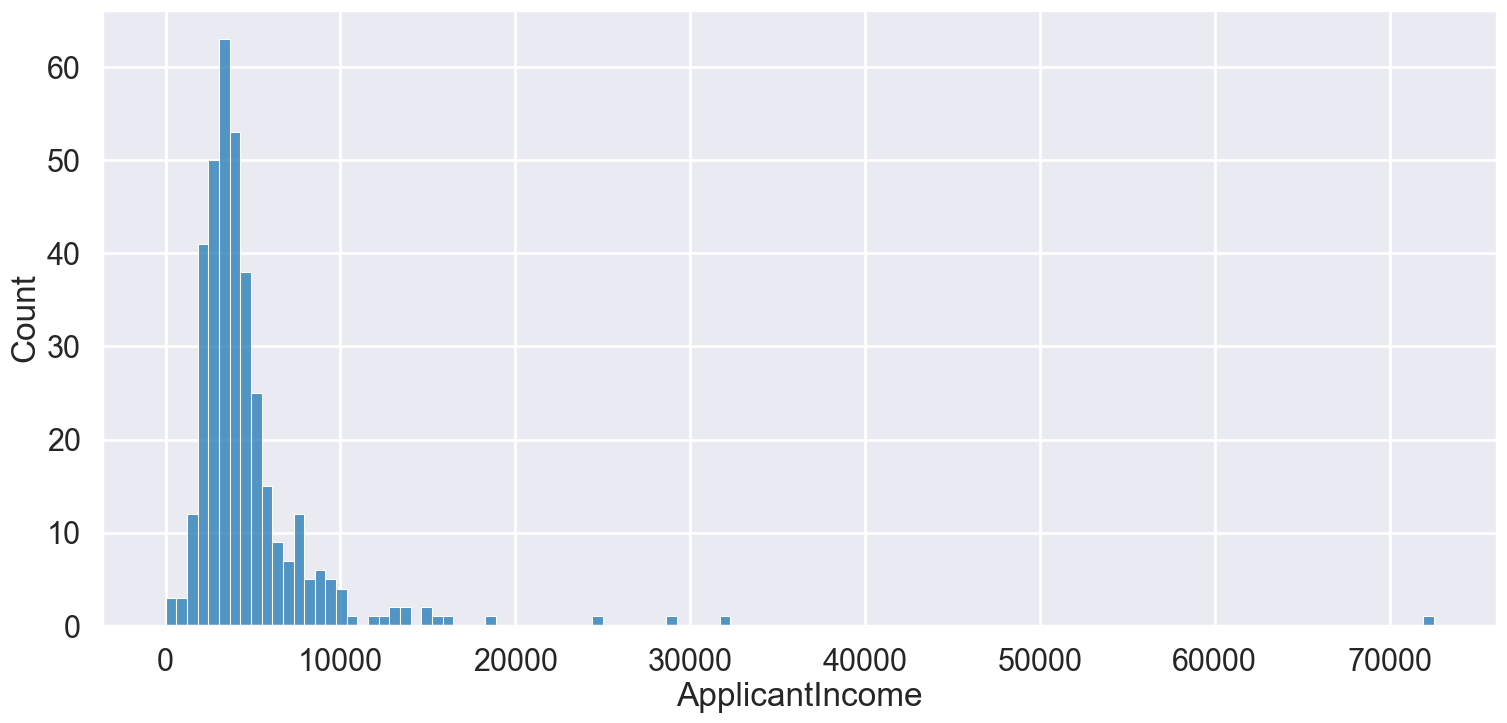

In [112]:
sns.set_context("poster")
sns.set_style('darkgrid')
sns.histplot(df2, x='ApplicantIncome') # Створення гістограми, яка автоматично ділить діапазон доходів заявників на інтервали (bins), підраховує скільки заявників потрапляє в кожен інтервал та малює стовпчики відповідної висоти для візуалізації розподілу доходів у датасеті
plt.savefig('histogram_applicant_income.png', transparent=True, dpi=300)